In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# Prueba de la distribución de probabilidad correcta

In [3]:
def func_signal(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)


def generate_offsets(n, scale):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=scale, size=n)

def generate_custom_offsets(n, tau1=3.5, tau2=3.7):
    """
    Generate n random offsets using the custom distribution combining two exponential distributions.
    
    Args:
    - n: Number of offsets to generate.
    - tau1: Parameter for the first exponential term (related to rate1).
    - tau2: Parameter for the second exponential term (related to rate2).
    
    Returns:
    - offsets: An array of generated offsets.
    """
    
    # Calculate the rates (inverse of tau)
    scale1 = tau1
    scale2 = tau2
    
    # Generate samples from the exponential distributions
    offsets1 = generate_offsets(n, scale1)
    offsets2 = generate_offsets(n, scale2)
    
    # Combine the samples as described
    combined_offsets = (offsets1 + offsets2)

    return combined_offsets

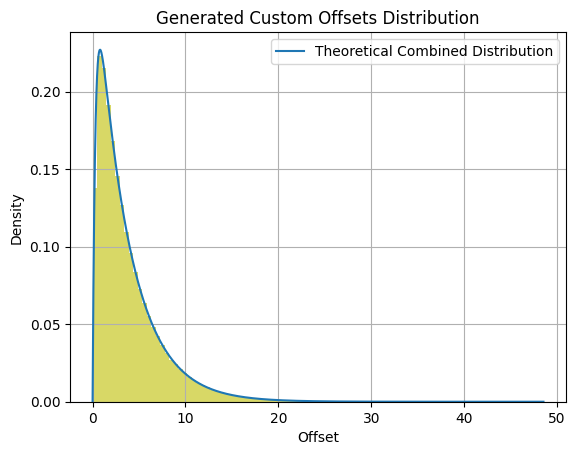

In [16]:
tau1=3.5
tau2=00.3

# Example usage
offsets = generate_custom_offsets(1000000, tau1=tau1, tau2=tau2)

# Plot histogram of generated offsets
plt.hist(offsets, bins=100, density=True, alpha=0.6, color='y')

# Plot the theoretical combined distribution for comparison
x = np.linspace(0, np.max(offsets), 10000)
y = ( ( (1 / tau1) * (1 / tau2) ) / ( (1 / tau1) - (1 / tau2) ) ) * (np.exp(-x / tau2) - np.exp(-x / tau1)) # La PDF de la suma sale de hacer la convolución y es la Hypoexponential distribution
plt.plot(x, y, label='Theoretical Combined Distribution')
plt.xlim()
plt.xlabel('Offset')
plt.ylabel('Density')
plt.title('Generated Custom Offsets Distribution')
plt.legend()
plt.grid(True)
plt.show()


# Plot individual segun la dist de prob de arriba

In [4]:
def export_data_combined(t_values, summed_values, n_photons):
    # Create 'combined' directory if it doesn't exist
    if not os.path.exists('combined'):
        os.makedirs('combined')
    
    filename = f"combined/photon_data_{n_photons}_combined.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data_combined(n_photons):
    random_offsets = generate_custom_offsets(n_photons)
    print(random_offsets)
    t_values = np.linspace(0, 120, 3000)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3mV, SD = 0.01mV
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2  (Sin unidades)
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01 (Sin unidades)
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9ns, SD = 0.2ns  
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13ns, SD = 0.02ns
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20ns, SD = 0.4ns
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251ns, SD = 0.005ns

    plt.figure(figsize=(10, 6))

    
    for offset in random_offsets:
        individual_values = func_signal(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)/1000
        plt.plot(t_values*(10**(-9)), individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Aca hago que las unidades se correspondan con los valores esperados
    t_values = t_values*(10**(-9))

    
    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (V)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data_combined(t_values, summed_values, n_photons)


[6.75908703]


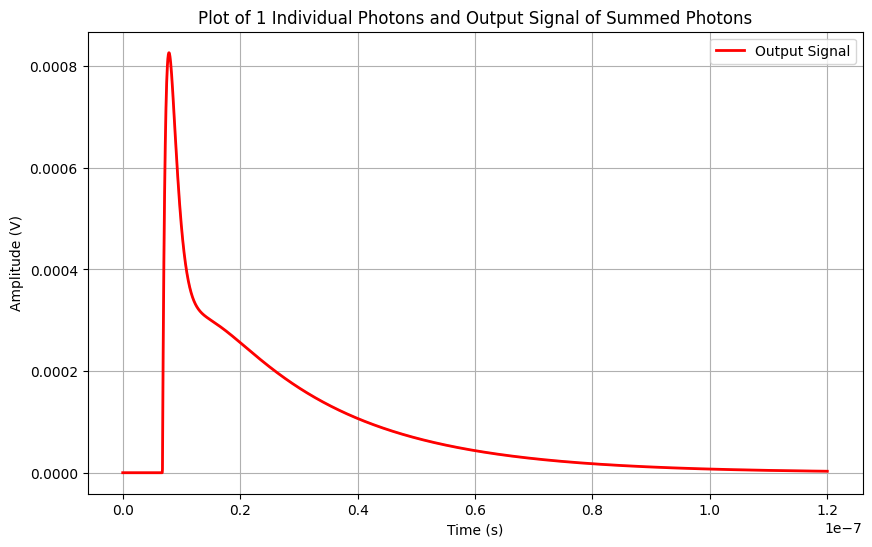

[ 1.08836778 15.61765946]


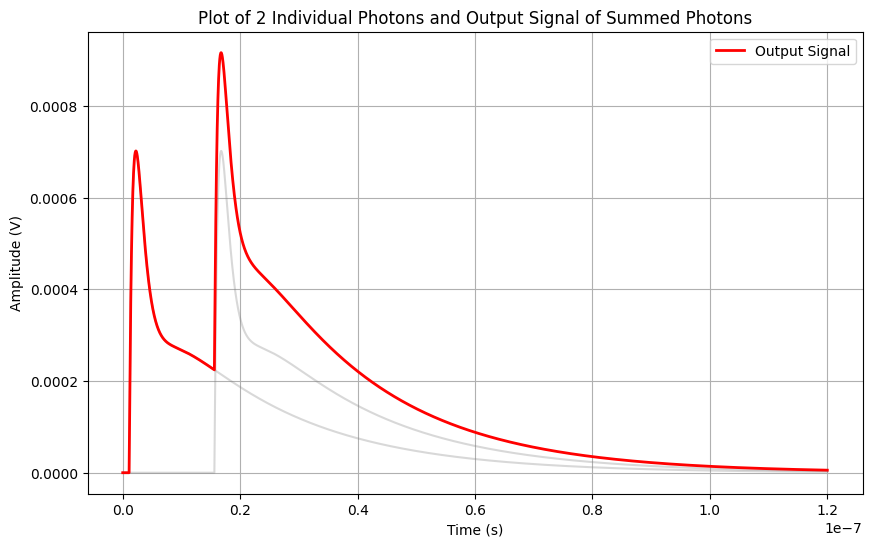

[5.65661177 5.17484887 6.89789509]


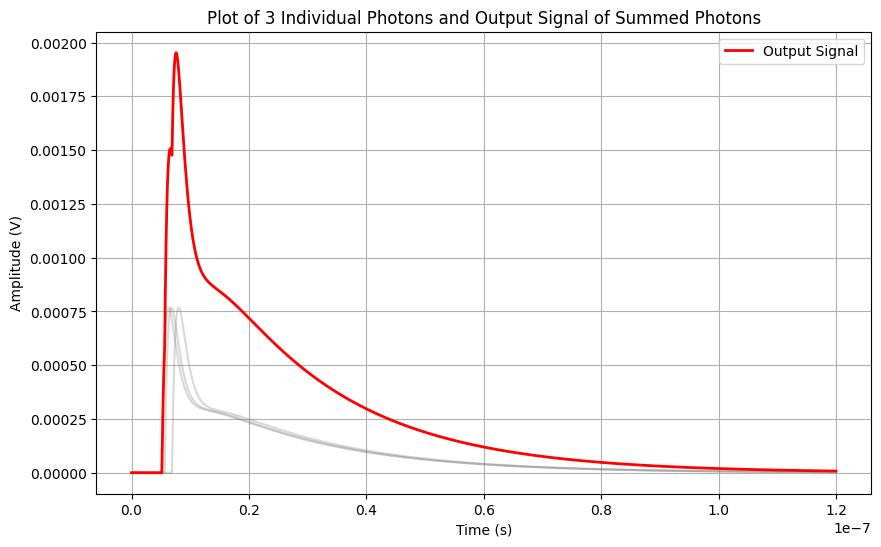

[8.79670073 6.35209402 4.16322608 5.99356901]


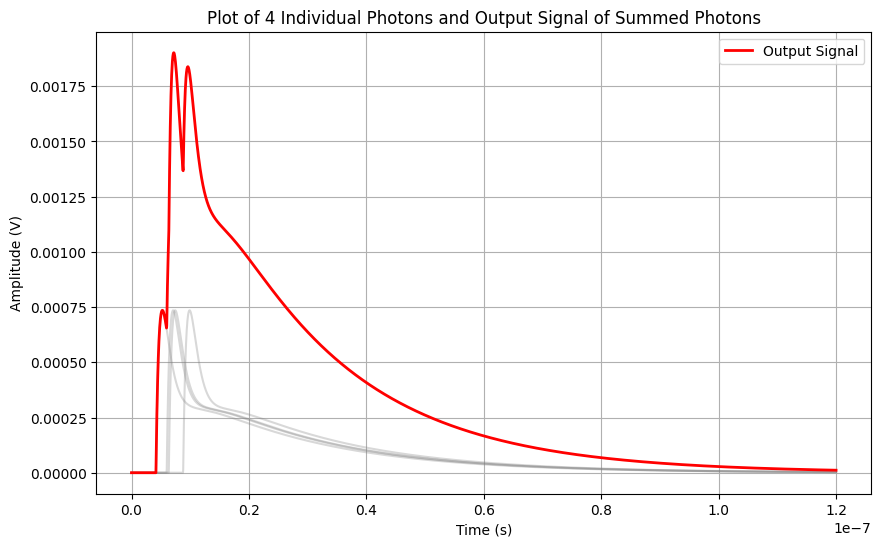

[13.49454522  9.87554572 15.36597176  8.53402981  4.57111663]


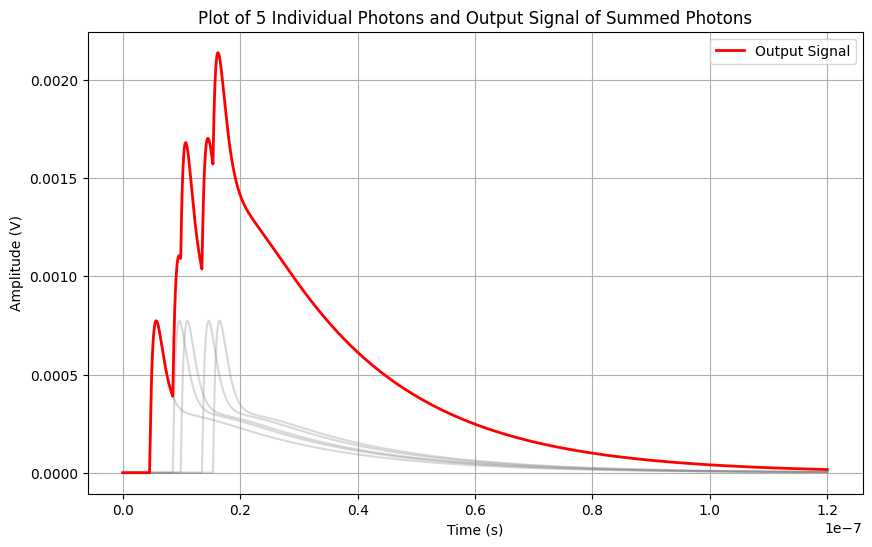

[ 7.54878377  1.2155636   3.49451753  5.31974636 14.4162031   7.88975278]


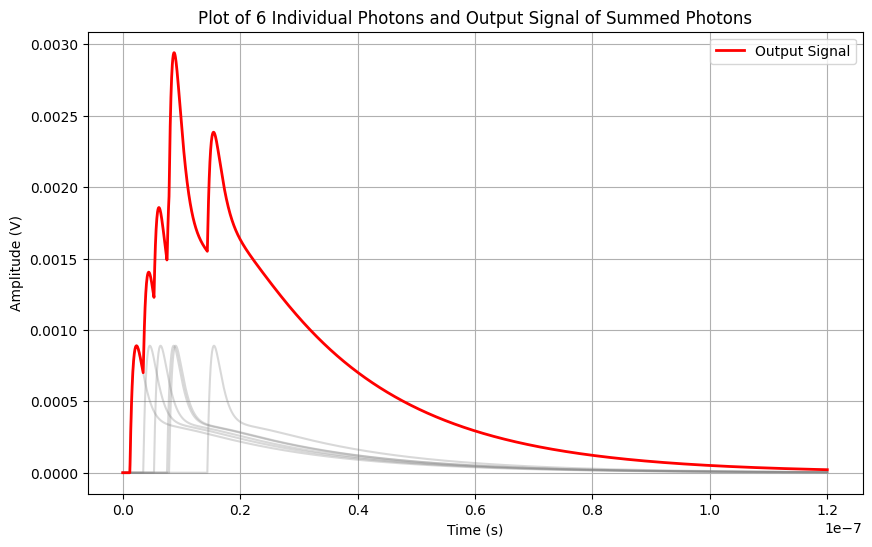

[ 9.40482144  2.19492005 27.99634305  2.3078601   4.80266186  5.65022749
  5.80368701]


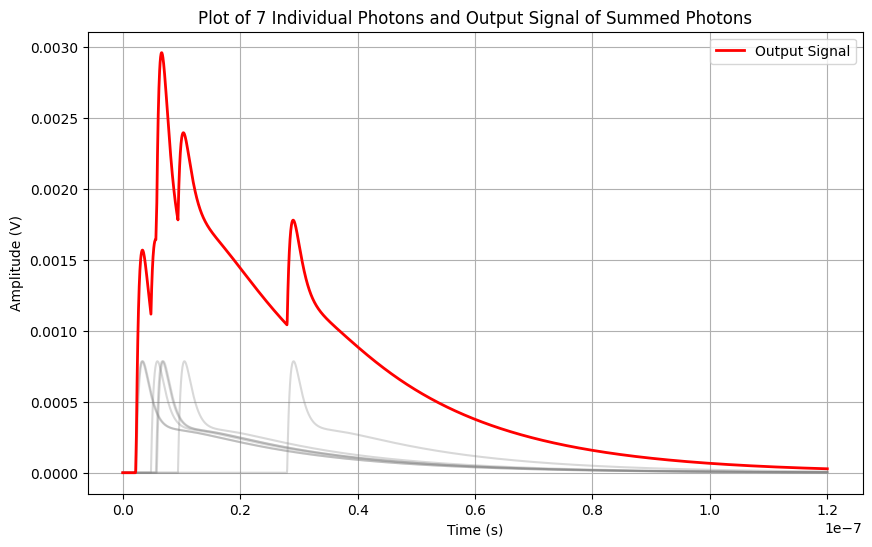

[ 0.40991949  6.95629373  4.69146871 14.85029443  7.64434182 10.41451523
  6.45247333  8.56888072]


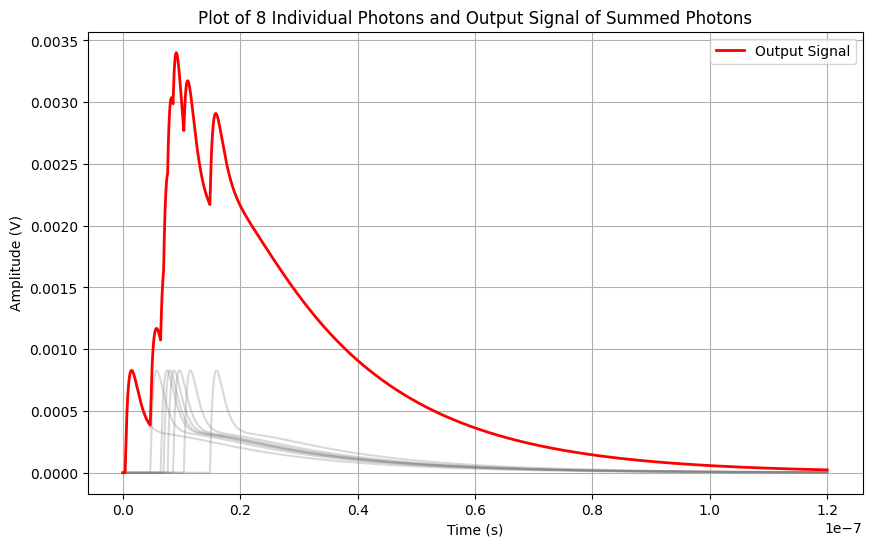

[ 3.94976869  2.44202367  2.40406298  6.51441978  0.44160561  9.87069366
 11.1632106   1.32553354  0.92861132]


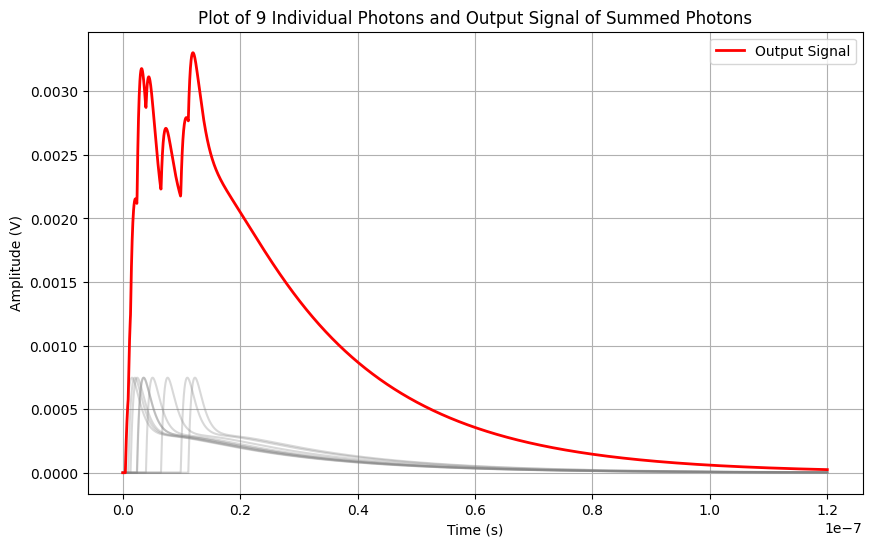

[ 7.67583777  4.10296735  8.89731666 22.62646461 12.40327204  2.06981621
 19.89315383  2.24220098  5.08152559  8.00577824]


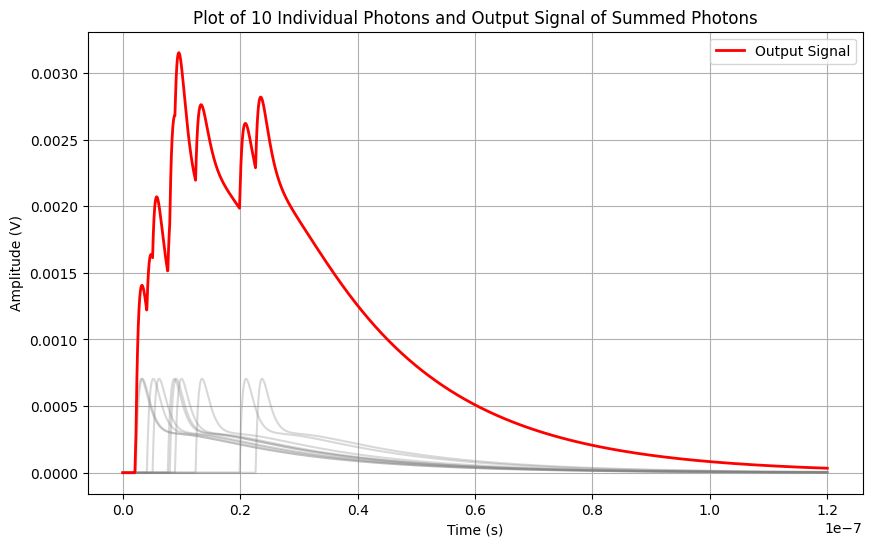

[ 1.53656486  2.5384886   9.26264443 10.30716094  4.11273304  2.59240808
  4.95522545  3.63084484 14.36686259  1.60518487  3.44268381]


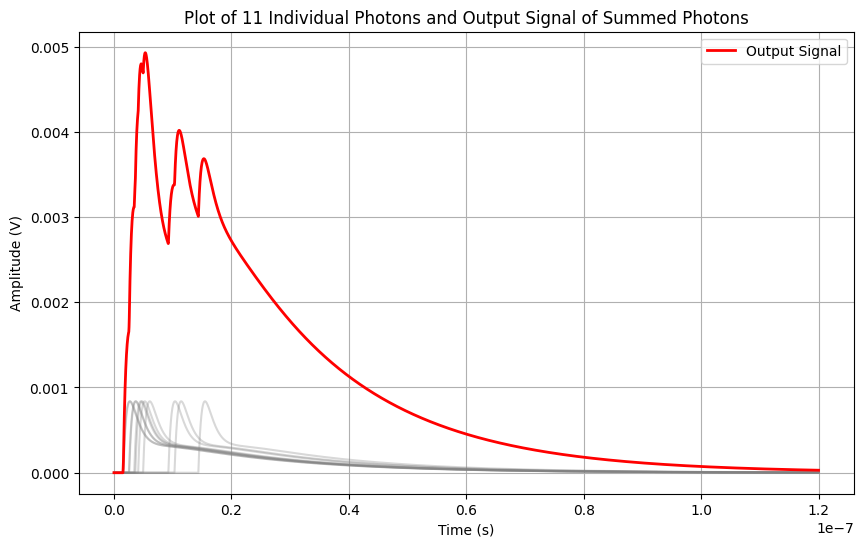

[11.23523378  9.62933764 46.08821697 11.38467559  9.06063682  8.9990103
  2.05139277  2.90717846  7.6351793   2.78132646 10.31255726  8.20579775]


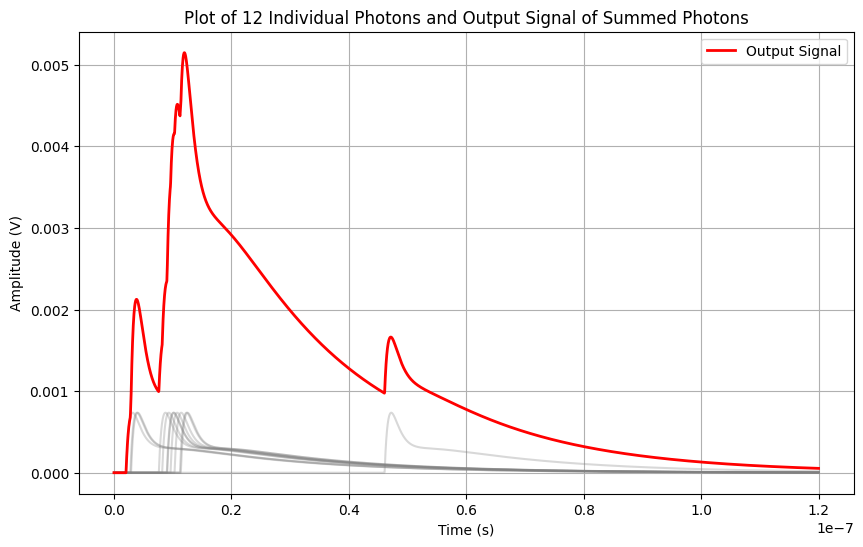

[ 6.14432174  5.49007246 13.91052065  7.50694517 16.97475494  4.23414039
 13.91331353  0.20801812  5.25735582  1.15398864  3.52511571  6.44214795
  2.54340971]


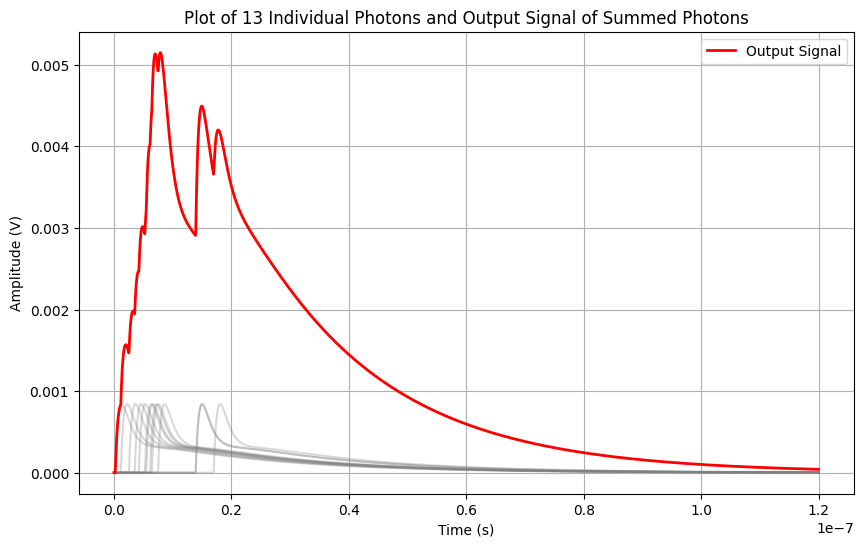

[ 4.7896655   9.09779957  8.31368834 20.693588    4.47598872 10.31012167
  2.31537096  9.84658665  6.07210882  5.28557575  1.43637508  1.9540328
  1.3859601  15.15644425]


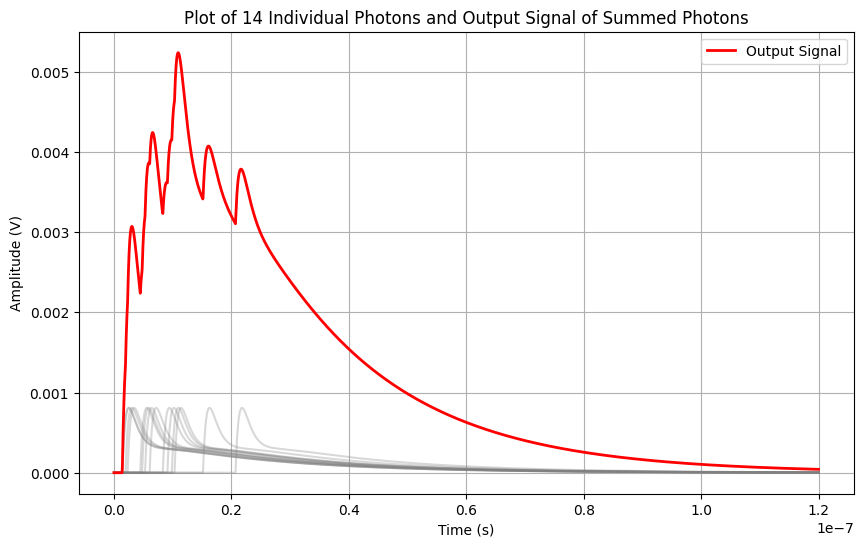

[15.18090241  2.79352624  6.79585837  5.21786981  3.1491205   3.4196011
  5.92889083  3.47525881  0.77076622  2.78408772 10.15137899  3.89735935
  2.62635674  4.91162634  5.22724502]


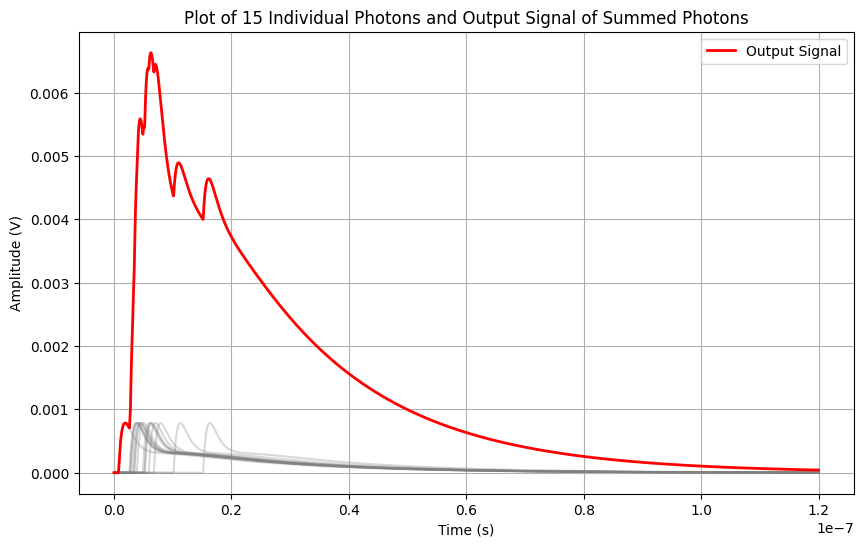

[13.84082095  0.84085632  4.38263248  2.24079814  9.09020465  2.09905094
  6.64373502  3.4984477   3.50757571  2.03653461  7.44985092 10.23632516
  9.68528753  3.5944285   7.65159284  2.97637588]


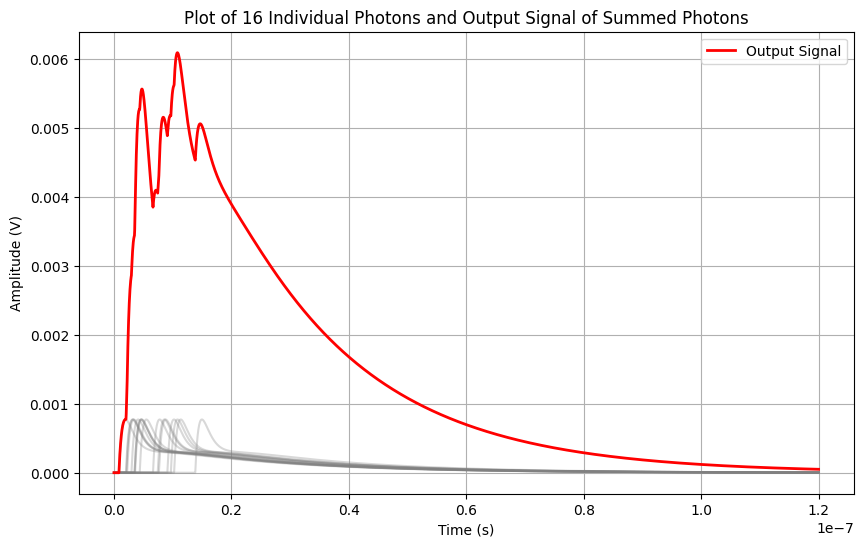

[ 0.95204662  0.69768242  4.32235799  6.21377275 12.07654168  9.04159975
  9.81531903  9.6861067   6.37957763  8.45225947  3.79188537 12.16304198
 11.32011755  1.58064291 23.79269261  3.15943758  3.09901262]


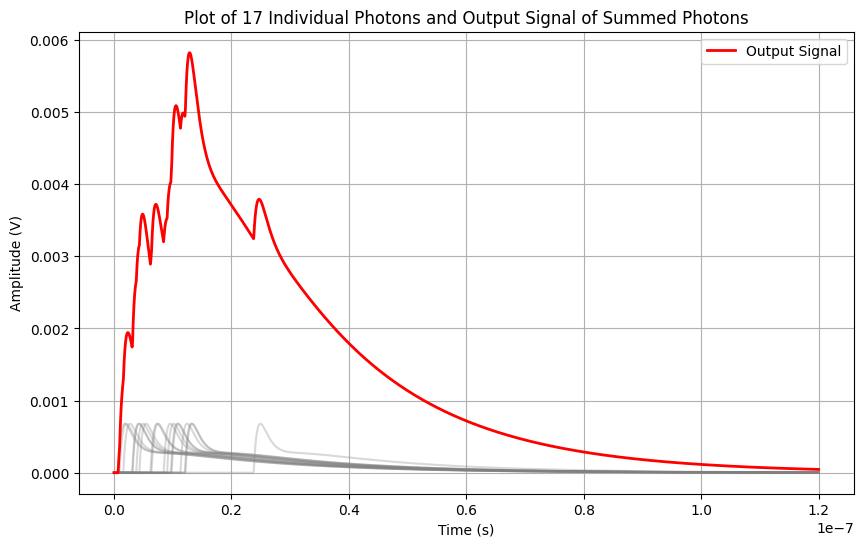

[ 8.60913069  0.9552976   5.79339361 29.1426945   9.34769922  4.49963167
 16.07325929  0.73683335 14.01412708  5.69944049  9.92551938  7.61654718
  2.78312846  2.26611641  1.97169305  0.54694489  5.62965358  1.36276881]


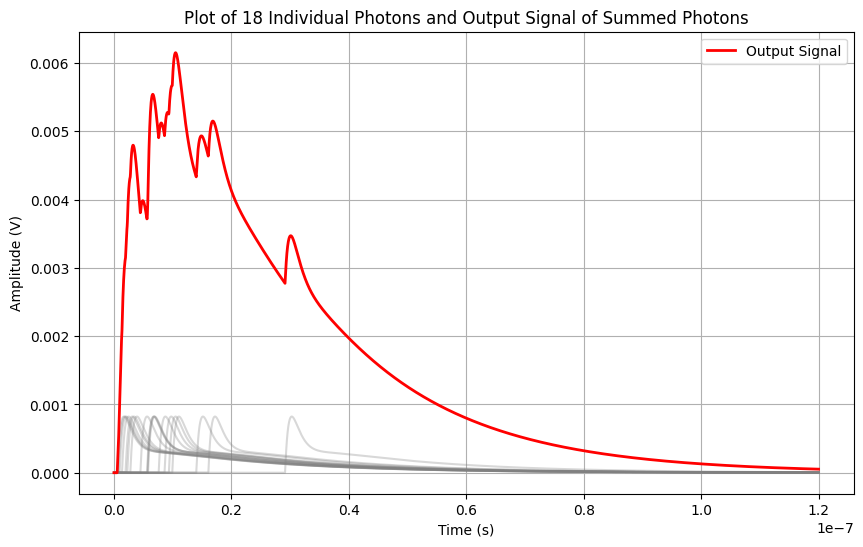

[15.21725262  6.11133501  4.6685923   7.22155221  3.5730695   5.16045672
  8.6319287   9.98145529 19.60356222  2.87564245  7.08916484  6.39340893
  6.84424927  2.79477374  7.87924573 13.55803397  7.62690161  5.73082567
  7.40599537]


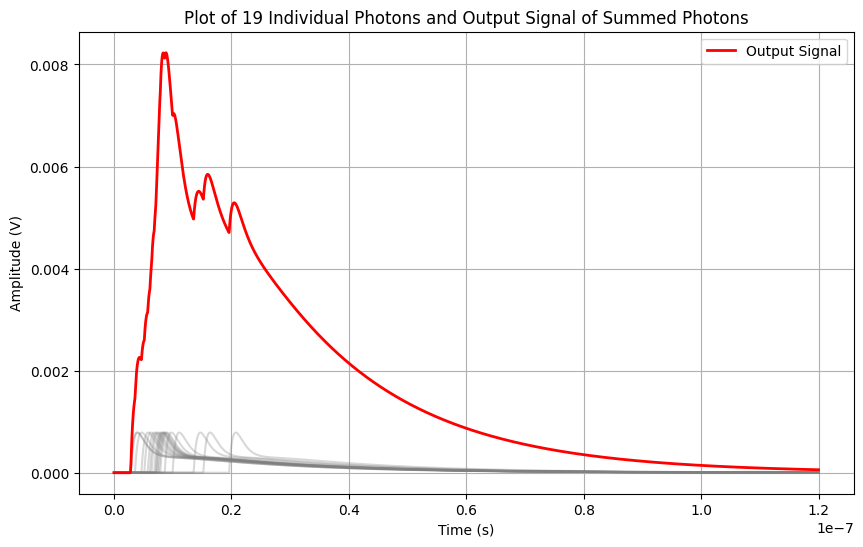

[ 8.44594167  0.77288856  8.07446994  4.20386284  9.50800688  0.89895556
 14.19441252  4.9883784  15.34091534 12.43675397 15.73590299  9.09790605
  1.72248561  4.94169975  4.29472483  3.80545335  5.04688583  7.99584995
  4.98889674  7.91524527]


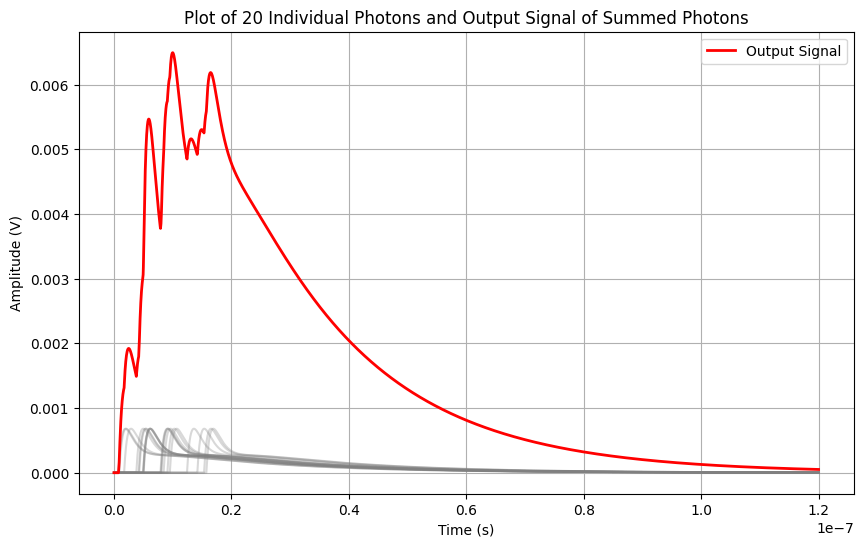

[12.11452229  1.06758489 14.58534761  2.61386224  4.11396786  3.39517852
  2.59256924  1.53149439  2.69206505  8.3158803   5.44547292  5.25946434
 26.46227586  7.89326625  7.11028095  5.42559046  6.99413252 16.51921395
  2.71481705  2.19483885  5.13541811]


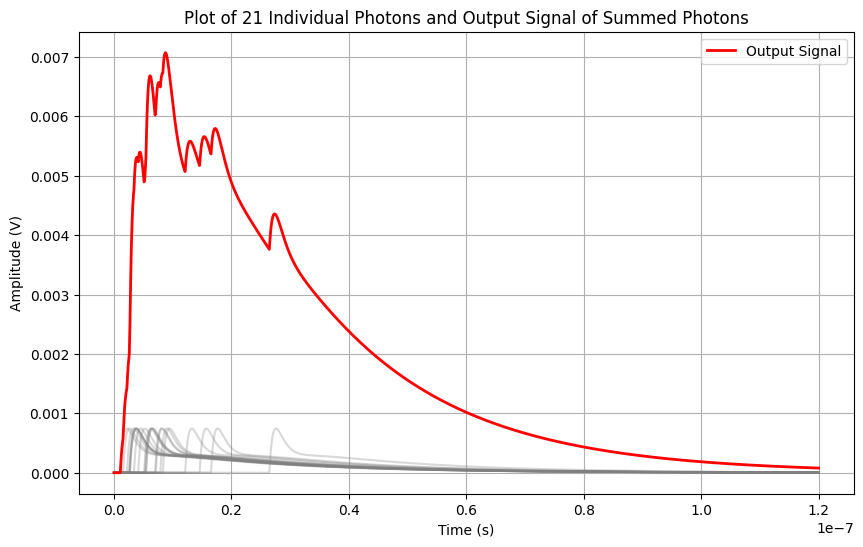

[ 7.0403603   9.38291981  1.36955287  7.58990614 13.5601043   8.3385697
  6.76730083  2.88054005 16.11153656  1.22455782  3.63092074  2.07717534
  4.37361906  5.10802273  4.82323168  7.62703505  6.33515865  1.06884297
  9.04233326  1.36658213  4.92581352  2.78831813]


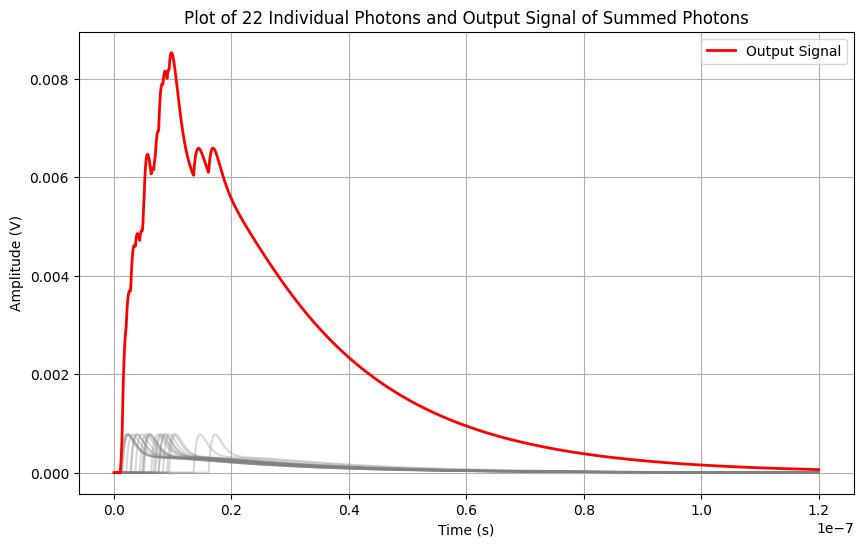

[ 1.54384855 14.05829452  5.14078151  2.03012352  9.10392061  3.12496851
  8.29320494  4.16001954  8.10230249  9.74124513  4.94937104 14.94537095
  3.89481749  5.81241063  3.85364401 16.57247692 12.97162763  4.70781994
  3.24909986  3.6077964   2.27704138  5.61304647  2.72971401]


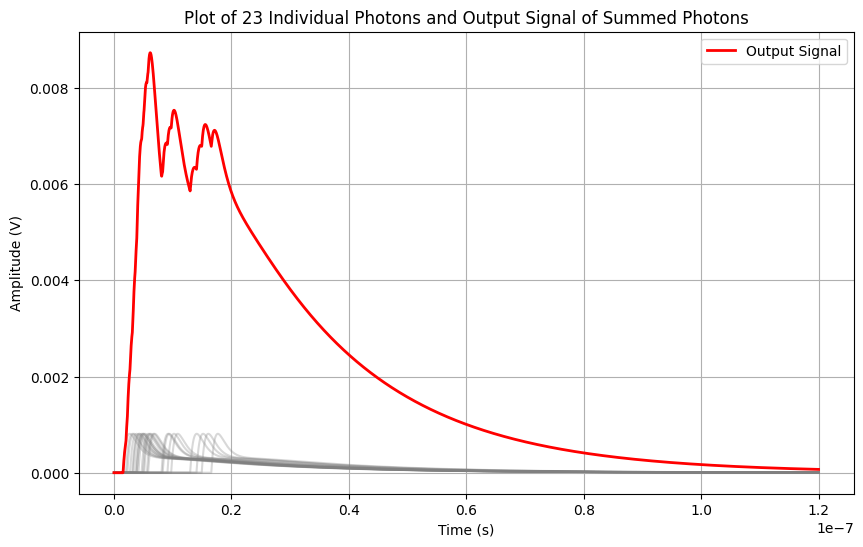

[ 6.23892473  1.40909466  8.26174614  7.98793698  9.81176295 11.80420033
  6.36453734  5.44928769  3.9322456   5.45139771 13.34679157  1.086523
  4.17731737  4.78907063 11.45644493  9.78812526  5.59319992 17.89040064
  5.68142981  1.30034197 16.09343841  7.75321473  5.21310921  3.31004947]


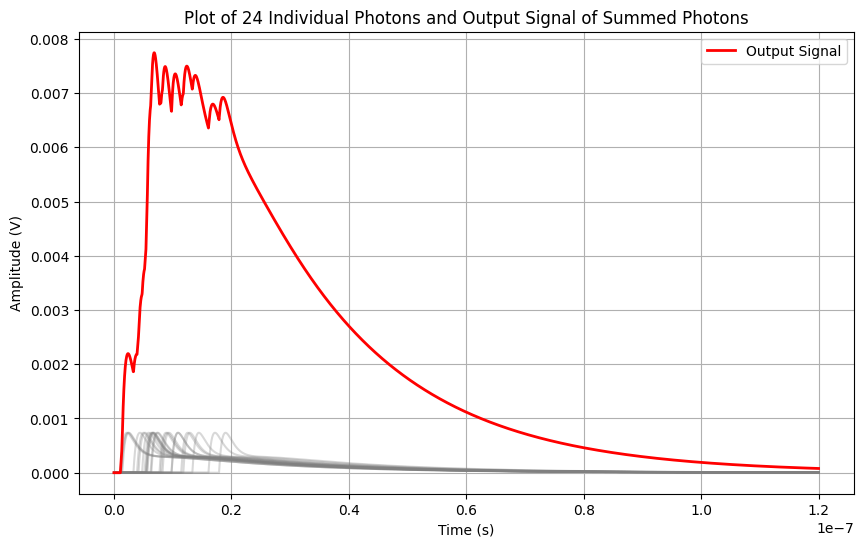

[ 2.11958754  3.70769887  2.44490172  7.82927167  6.94149815  6.40585362
  4.56272959 21.96376583 13.5608173  13.31211977  7.42419876 13.31099419
  0.64468893  5.93762067  0.32302006 10.25473924 14.08859399  3.65506369
  2.33427963 10.24746257  3.43830027  7.35806494  4.18455942  8.93064267
  2.26501828]


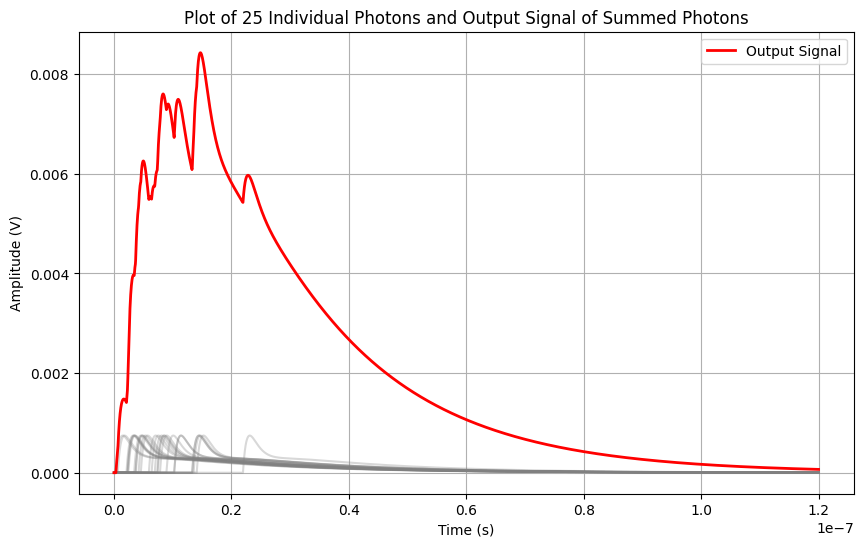

[ 4.57588008  1.16083855  3.39599042  1.1492793   7.78939664  3.99602727
  2.65326434  3.41640874  4.21330671  8.08996476  8.70606054 12.40840629
  1.56647846  4.03592926  9.41066896  0.81038474 12.75412076  8.0917134
  5.72490731 20.83335478  2.35053721 13.43021304  6.28660814  5.17598262
  4.72522772 11.12161168]


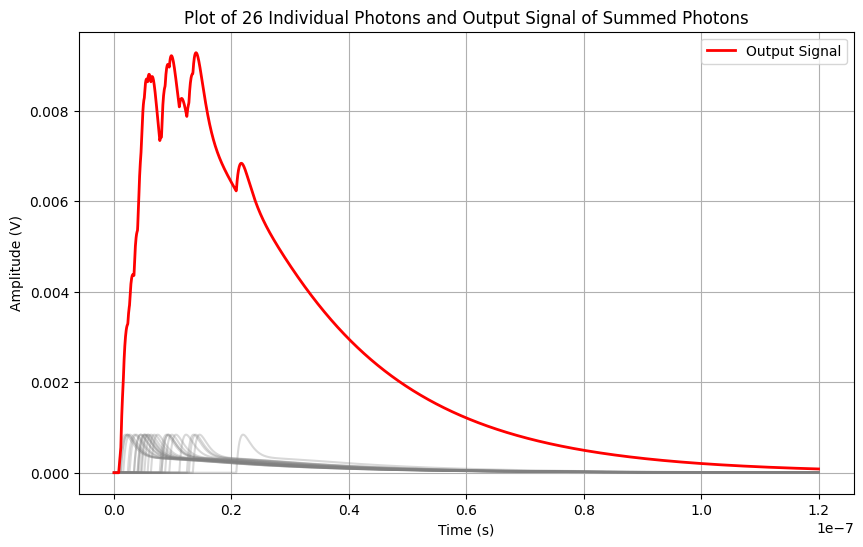

[ 6.33997575  1.86487278  8.84922529 20.81853821  4.69946654  2.49026502
 11.50134618  4.50732856  8.11638428  9.88880649 18.4370383  11.65439296
  3.7147989   3.97601962  6.54470601  9.51821916  3.40734902  7.30723561
  5.31107526  1.53902695  8.56508065  4.81535367  1.51033997 18.8065362
  7.86528872  3.89420508 22.7587282 ]


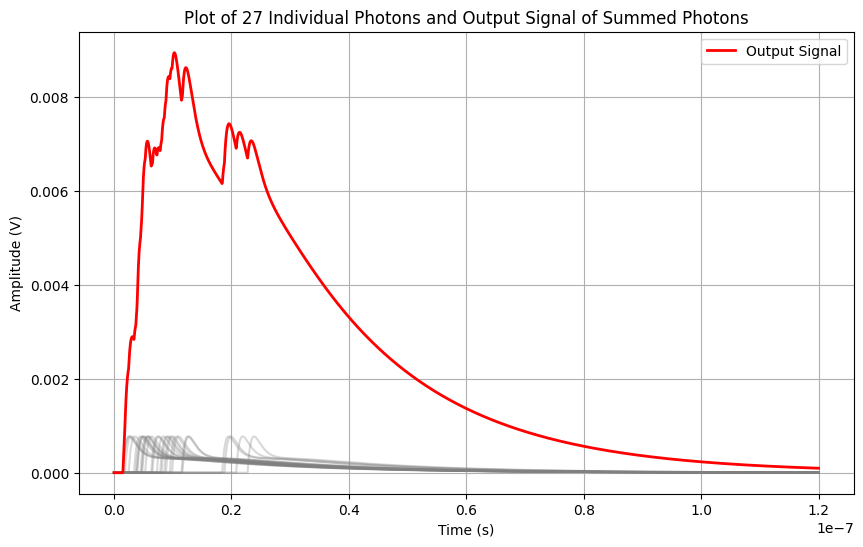

[ 7.88537586  5.50808536  5.86490481 13.36520277  2.83091763  5.0471938
  1.8888365   4.22632746 14.29607828  7.79569182 18.74185837 10.10817796
  0.67974703  0.80452448  1.82909039  0.99888034  6.77414805  8.24090076
 24.66564773  7.78675748  9.21734332 10.59454937  7.23347907  1.77754638
  7.3083436   5.38467589  5.71045558 12.19413273]


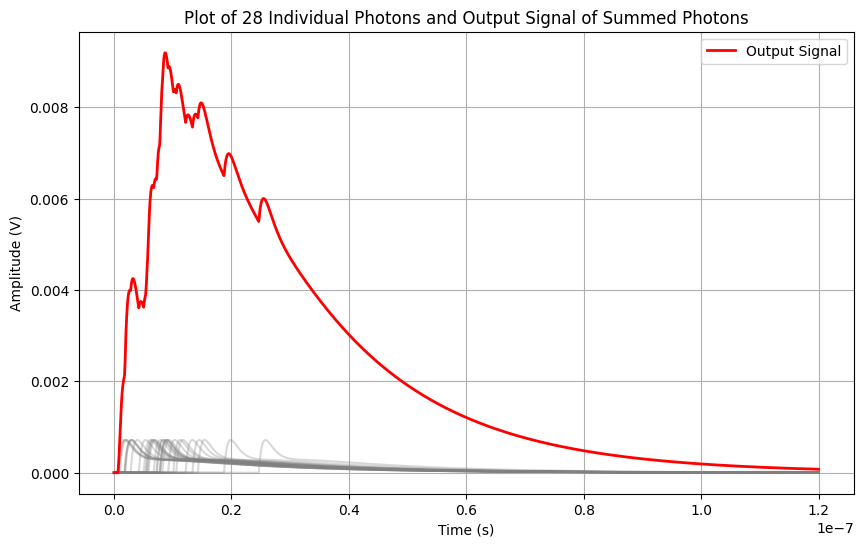

[ 2.73345089  2.39822462  6.36236011 20.57713061  6.60640714  4.39795535
  1.12008806  3.9275794   5.99245616  4.03455092 14.14793178  3.77918595
  5.7543624   7.98767552  3.08143855 16.76570611 12.36825183  7.46244608
  3.40946302 13.22822505 13.46925932 14.87075942  5.22770967  3.00984488
  3.70563438  8.62801367  5.62776039  2.52226521  5.06689981]


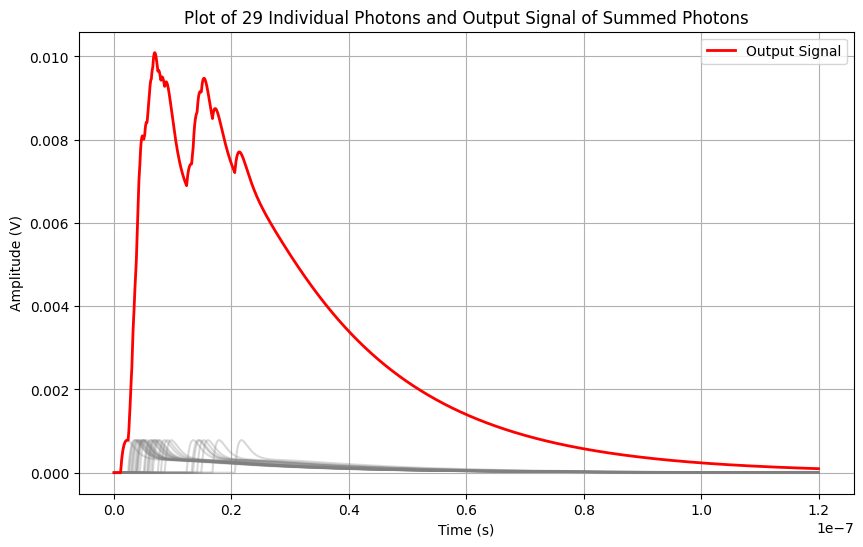

[ 6.01788836 10.1083548   7.53256604  8.25726884 27.14711452  2.3188829
  4.97474503  3.95628013  9.93931756  4.39576547  3.38154743  5.98726138
  8.76038974 17.18671498  5.2667602   9.40740829  4.3104878   1.59282331
 12.59141732  6.06210624  8.97479204  5.10531078 21.91584403  6.60689182
 20.1396418   5.546726    2.48767601  3.4128138   6.88320743  3.07919194]


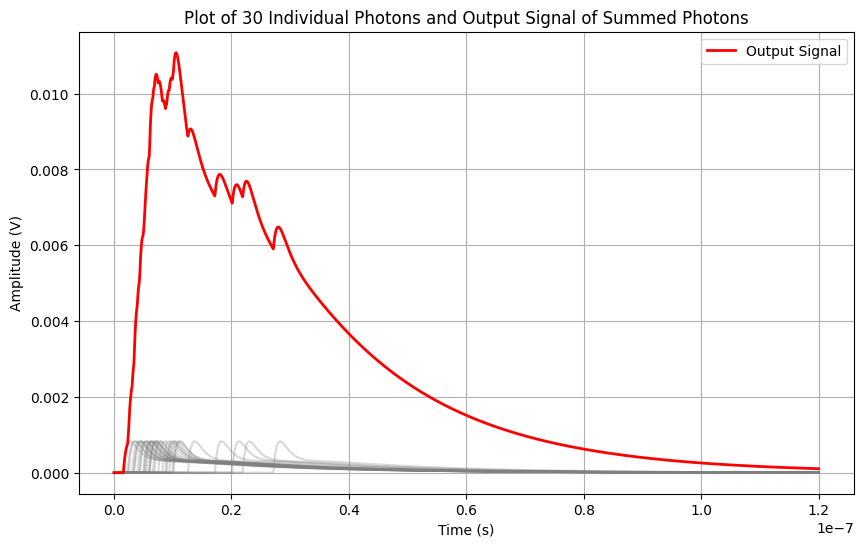

[14.05959424  0.05799232 22.91837059  1.32398308  4.81265503  3.70482617
  4.68171898  5.79622914 12.28266668  8.0954957   9.082969    2.4412288
  6.27803627 11.44815292  1.61360587  8.17271757  7.10771877  7.72146626
  3.67229797  9.6574838  17.9477235   4.06327015  3.87752875  0.91523993
  7.49615184  8.07068469  4.56238187 13.37878652  4.23036259 10.71468814
 19.14823336]


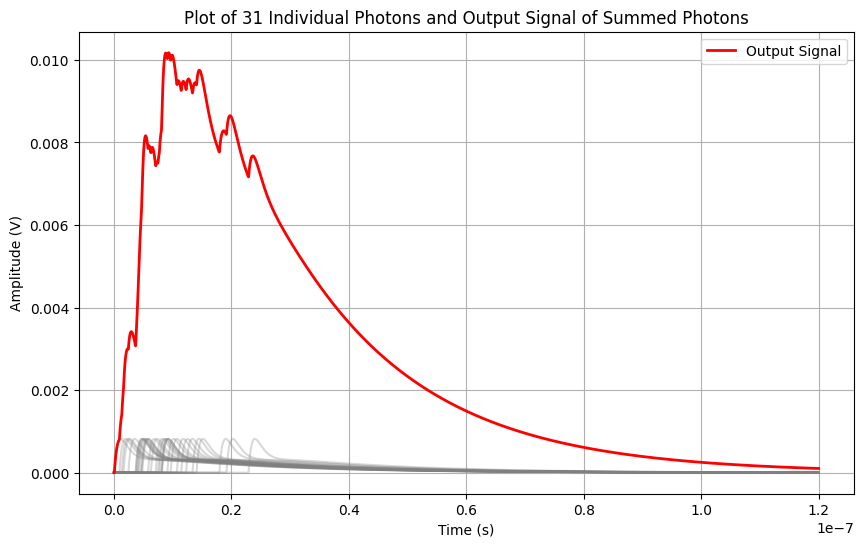

[ 2.47131211 11.23348642  5.49131541  2.98443814  7.02526099  3.94299722
  5.98848795  6.0601388  14.15489206  3.0859322  12.67695801 21.79083843
  5.68633743  0.42966465  3.02924705  6.54232765 32.88324634  8.37160445
  8.90665122  6.77257272  7.55542981  9.78144447  4.7028769   5.31539023
  4.62173474  4.1438415   6.95588199  9.42740024 11.45724857  6.67777222
  2.68210545  9.15171424]


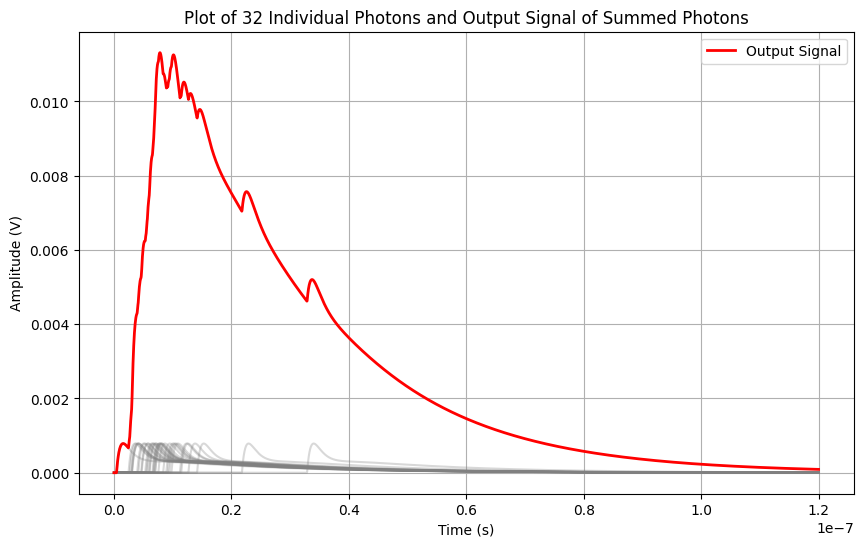

[ 3.74032037 27.06420628  3.97953855  7.04325864 13.93317087 16.89910241
  1.30981251  1.32671311 16.00118552  7.06393144 16.31328476  6.7360697
 22.44808604  5.48320494  8.00446604 24.80330337 31.58353007  3.11716535
  2.42273282  3.21501874  1.59835368  7.94069985  1.41096569 18.9861301
  7.51706629  4.22951264  8.01891941  2.3806936  11.36970798  7.59299031
  4.88388477  7.79866057  7.95351992]


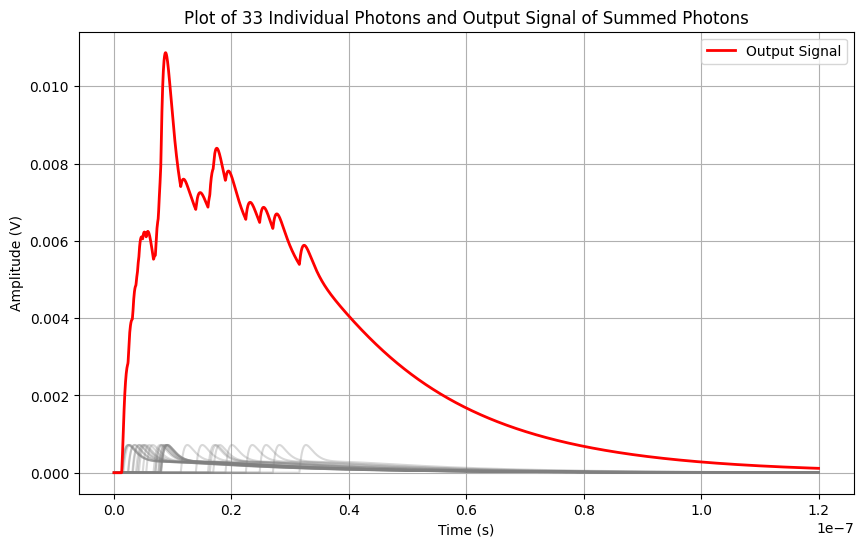

[14.1948675  11.45318516  3.36550025  8.80157192  3.62237084  9.04170723
  1.31402964  5.75804176  2.11349208  0.49136972  8.04272245  1.86918879
  7.3531534   5.31969476  1.25401161  3.79803254  4.86335604  8.24648158
  2.04307159  6.63171649 11.24304844  1.10030159  4.80659639 10.11112264
  6.50711264  4.53727389  9.08853896 10.17761299  9.4508212  13.24073896
  5.57231432  8.61586155  5.39516617  1.44260786]


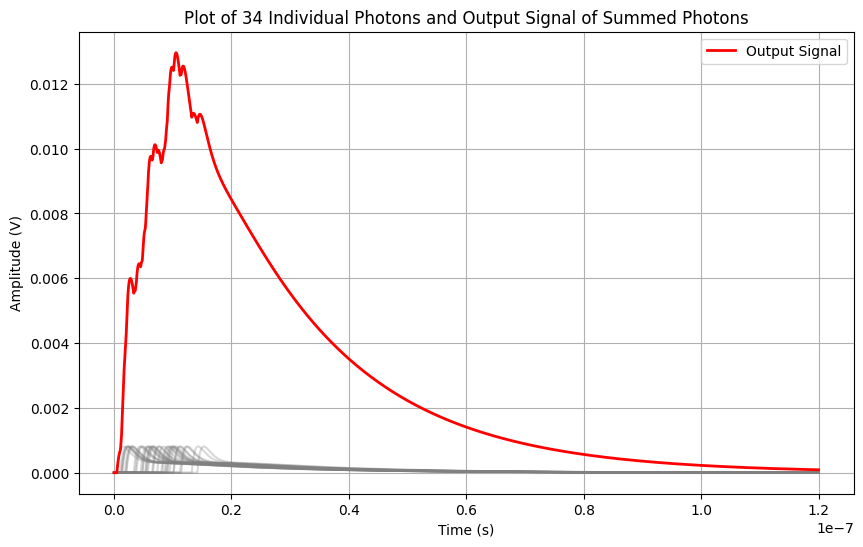

[ 6.10466827  2.45986855 21.840792    3.36147661  1.79886448  7.58258066
  4.05244792  5.71431966  5.95223997  6.57036605  1.87800139  5.06418124
  8.47679557  7.54025734  0.62862877 13.2831348  17.91628725  8.42939001
 30.96437042 17.79407504 11.18937271  4.45450352 16.00812377  3.82423289
 10.0562397   2.29371546  6.01981997  3.62646345  5.31149686  4.21522911
  6.77253623  7.96422007  9.56580761  1.87305294 12.26335603]


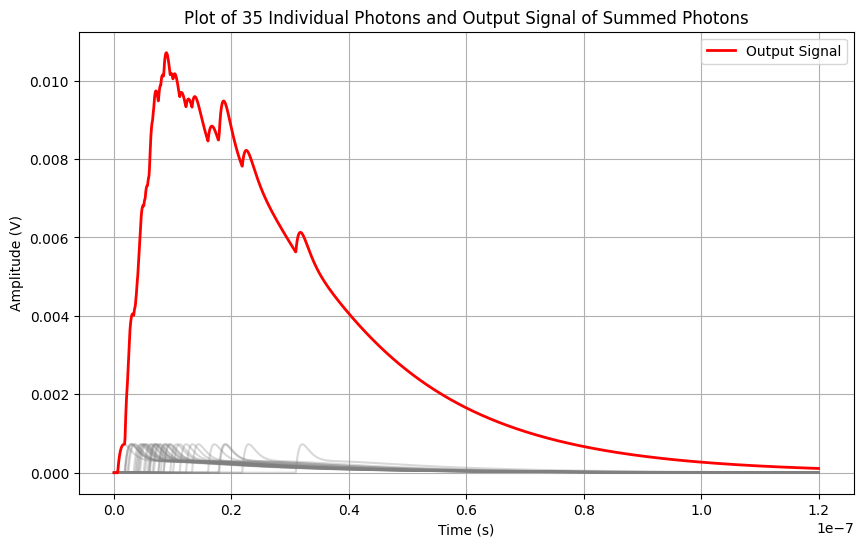

[ 4.08699257 12.38288516  2.85087964 18.5125072   2.32915173  7.26738054
  2.35084406  1.74398287  4.84393754  1.01200534 16.17148177  8.27500298
 14.98761713  1.86413847  7.81847616  3.11932293  6.36256945  6.41545832
  7.81865473 12.07444614  6.55187707 11.81413995  8.90527816  7.19039769
  6.55001289  8.16136135  2.72167637  9.22987762  1.57490871  8.4754044
  8.6905028   1.77889896  5.42187034  9.30166948 15.49902187  8.54136577]


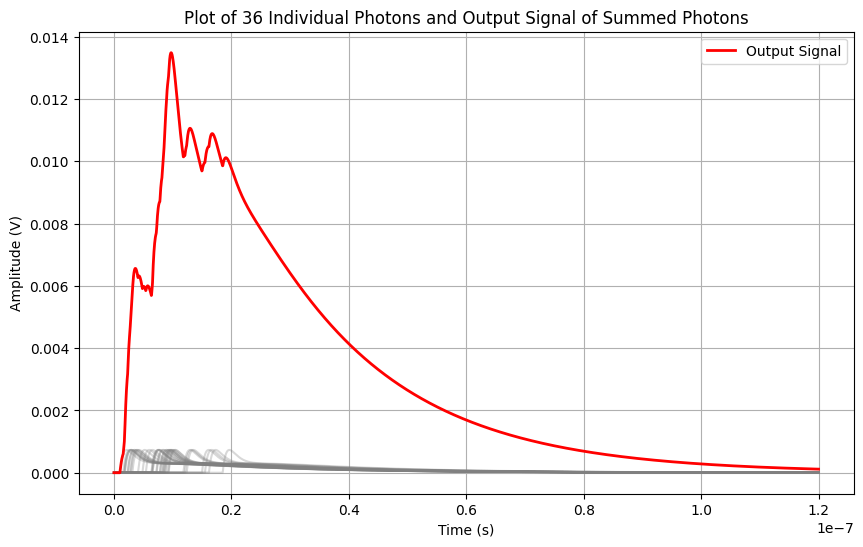

[ 7.057314    7.87496312  5.76013103  3.73076309  8.80635926  9.47257691
  5.7740793   5.17401586 17.70009988  4.85125592  4.06488579 10.149803
 30.89677465  5.04566923 13.41661611  9.53358821  6.37836353  2.09127108
  1.799994   16.32429087  2.57965934  3.67120264  4.09809222  4.58477525
  9.1606054   2.24077652  1.18230092  3.05328817  8.31149315  6.86613181
 13.91529037  3.59523431  9.95661694 13.55724292  3.31443302  6.75060436
 13.60498481]


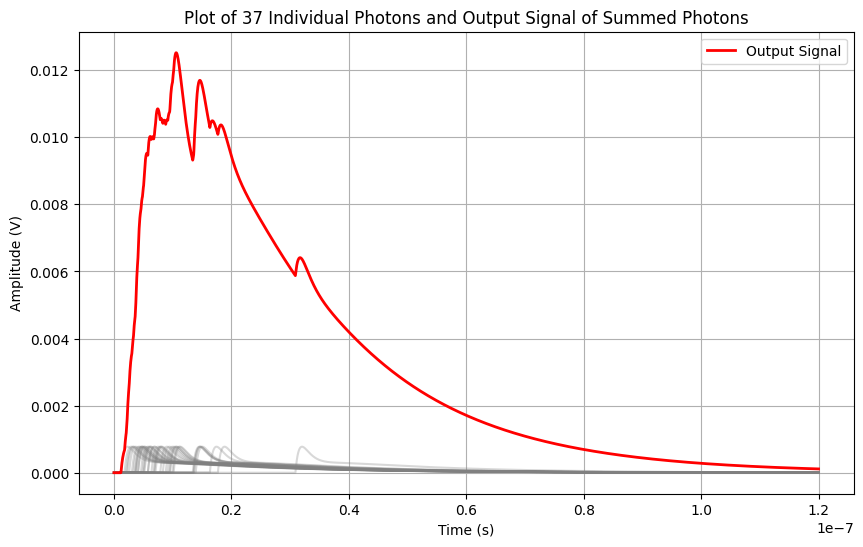

[18.05936762  8.76696503 15.73129913  8.53972791  6.05212532 17.07510693
  6.1602173   3.1676925   3.16430958 14.50634967  5.3195786  16.63318726
  0.76176265  5.06884524  5.75929744  6.00523044 11.78479952  3.97412552
  3.96906054  6.71676324  5.5115207   1.71239259  6.82931872  2.75368288
  6.91287958  8.78427841 14.45674005  6.51073445  8.50889021  1.77275177
  7.04685074  4.13465954  3.01988727 10.84015748  9.88624655 18.10700436
  4.13722563  5.84717775]


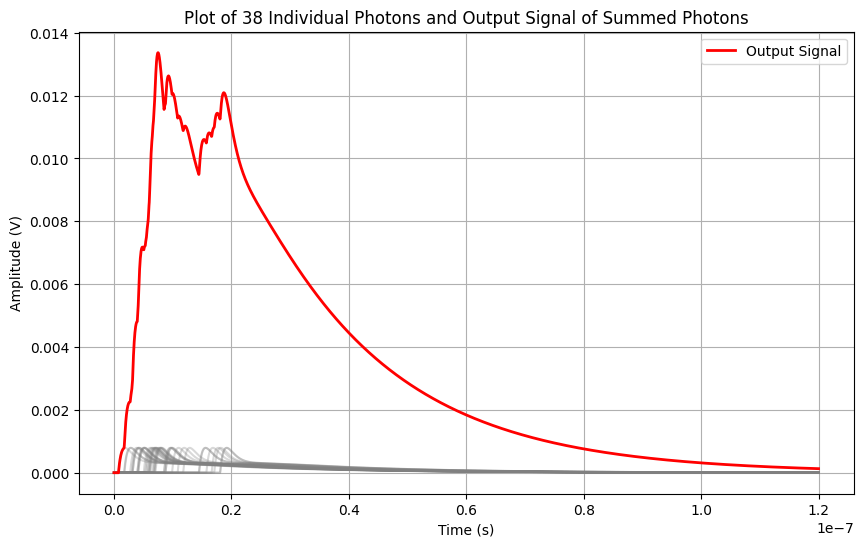

[ 6.45801406  5.9914721   8.51360437  2.59354852  1.62011359  2.37700811
  3.8918014   3.18060915  7.5108769   3.3760845   5.46418087 25.75801547
  1.76906253  2.67315834 15.31149861  6.30078482  5.45088146  5.81021988
  4.19551932 28.61722971 20.7999949   6.77179071  1.81019042  4.32344339
  0.52791053  8.88299599  2.99943947  8.35731436 14.3014998   6.14443955
 21.16048466  7.62366939  6.10059549  2.07306481 11.1670613   7.91871592
  8.30456654 16.11610676  2.33839175]


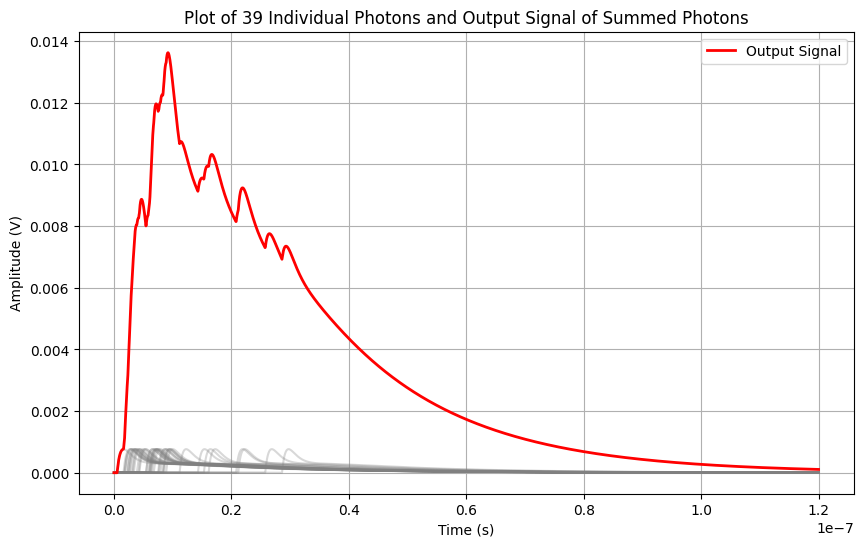

[ 3.43190075  5.04472174 11.90623553  0.60976142  6.27058971  6.51078506
  5.90719821  3.93186259 11.95703761  9.24295863 10.66767625  3.45878936
  5.63248877 12.1909706   5.34919471  9.02829185  5.73081369 17.14909717
  9.2632191   3.4427759   3.55951926 14.89615349  3.55081914  6.49113901
  1.55284855  2.94416988  3.48552852  5.73407793  1.34597017  4.30773307
  0.57458406  7.48593311  9.14934677 19.67668599  9.78967208  8.58416931
  6.17311913  4.47746884  2.46183389  1.6453781 ]


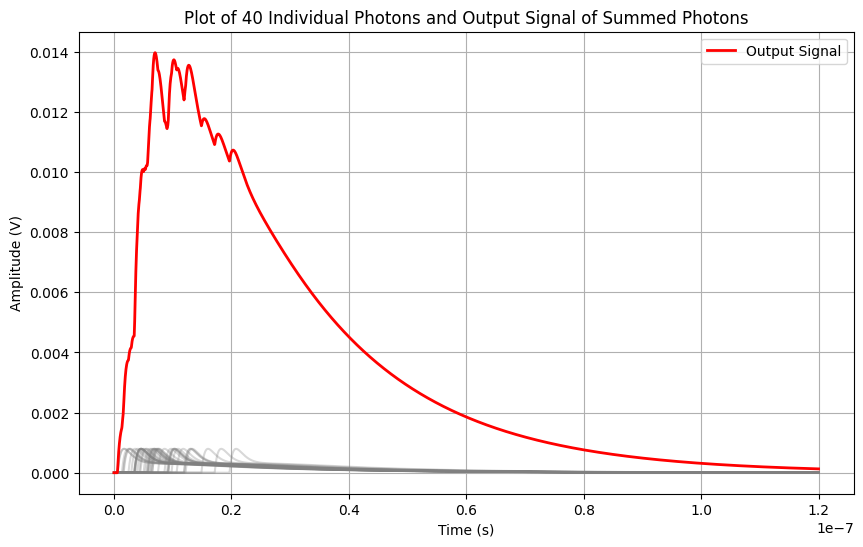

[ 4.29188606  3.6596826  17.62795319  2.30324253  9.4711336  18.43478196
  4.52159854 19.58788135 17.76711112  5.46230377  4.60961438 13.73826661
  4.81159827  6.92602169  0.22274523  6.65986252 13.45203831  8.82009676
 19.43854747  6.73006104  9.46379309  4.61398792 18.33928977 18.32328617
  8.5187792   1.64826293 10.00650308  1.18519077  2.60521501  4.08080544
 18.19145019  6.09256789  3.48279925  2.50432806  7.80796168  2.83217246
 10.82186831 22.50549001  3.51836342  4.40648987  5.2493403 ]


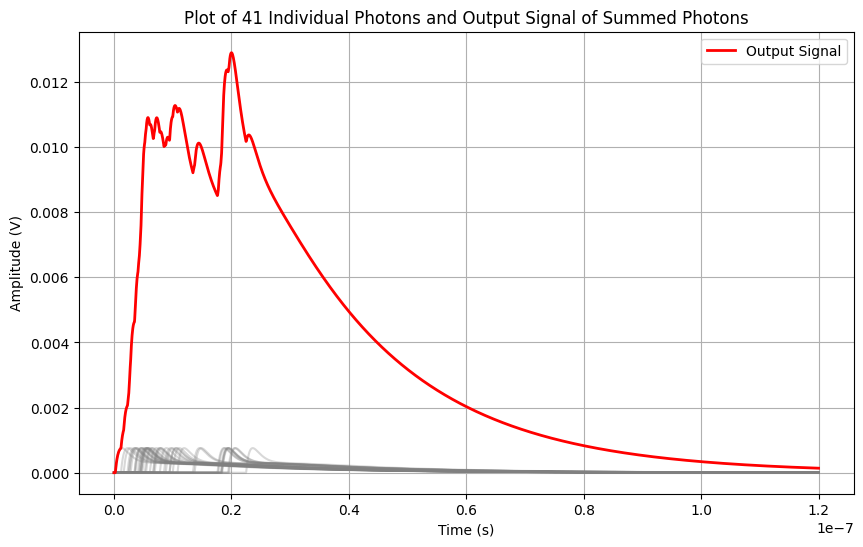

[ 5.09121164  1.82349218  2.00995959  7.49021008  5.21891163 21.49743893
  1.13614737 14.13448318  5.78790258  4.84942673  9.70218293  2.75059607
 12.51076862  0.81986399  4.28059921  6.15520173  9.66730785 20.21206958
  2.93406218  5.7352025   6.56898555  2.38414744  1.88275363  8.88171899
 10.99280173  5.78763251  7.14982841 10.57389951  5.21225635  9.37468277
 12.81267928 15.47452145  6.64735694  7.61691854  2.10540101  8.15526484
 10.52645089  4.65677077  4.56435952  4.58039828  2.54370242 10.86338158]


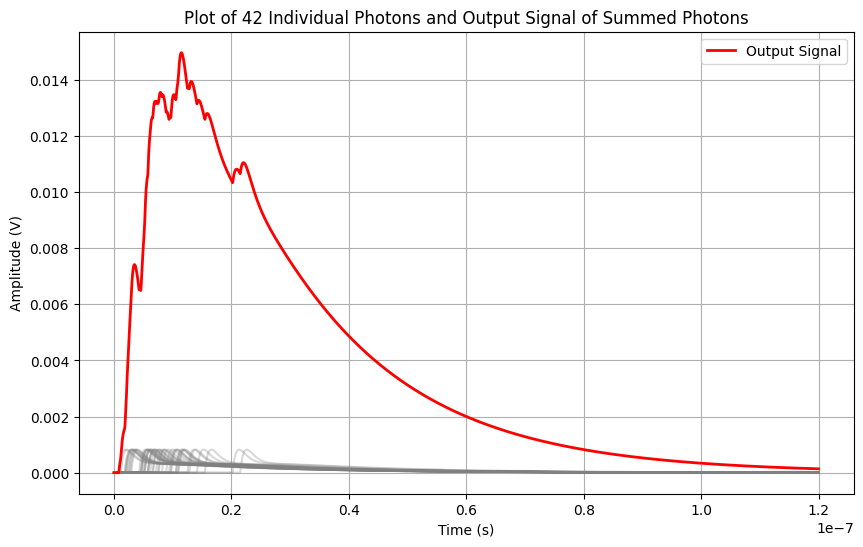

[11.30083052  1.44843831  4.60911994 11.43322923  4.97307085  4.63043333
  7.34995323  5.60205661 12.58803002  3.34432459  3.64520531  2.86239439
  5.26063065  2.2005238   3.54883929  7.30574992  7.12837248  7.93383894
  4.47517728 15.01460489  3.32843427 11.42819508  2.27712435  1.35624539
  3.90358649  3.90101685  5.48275585  1.53785205  4.86587689  2.88566532
 12.34724881  2.08396628  3.53643899  3.68777481  2.23930577  4.55577082
  2.16984448 10.49234212  5.91811917  1.13477348  0.60563462  8.70103627
 12.60145332]


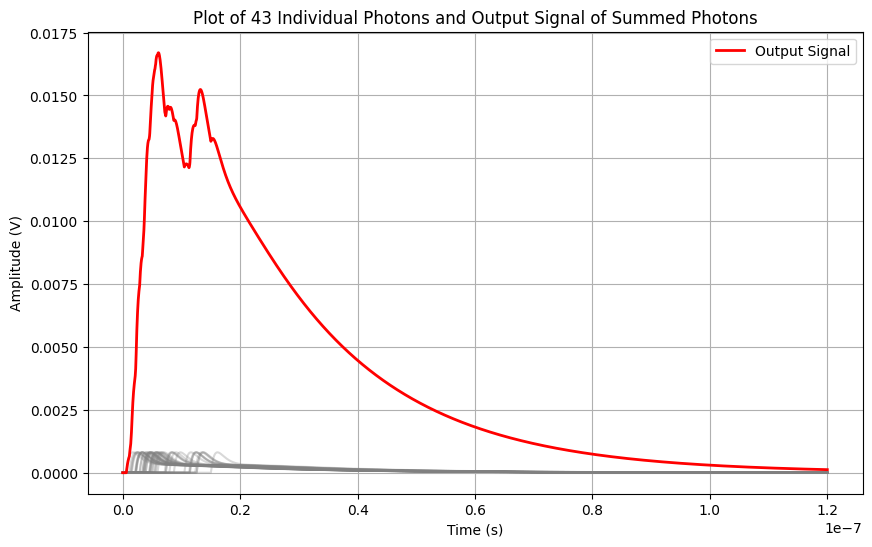

[ 8.81190032  5.62763588  9.17907656  3.68429359  1.33639515 10.00464982
  8.25008679  1.20907807  5.09523072  6.95936118  2.53527871  7.07641348
 11.60229115 14.16492488  5.14041647  5.0940979   8.66581536  3.43217391
  6.24724375  0.99636193  9.48082749  3.93347387  2.97696866 17.75703046
  5.03726327  1.86242501 11.38853169  3.61786087  3.59581172  3.26231489
 10.2518919   2.98751559  3.15795989  2.19332179 13.07787711  9.61661732
 11.29895735  1.90434351  2.58228612 15.67251981  4.70600803  3.83082609
  6.01134977  5.42689234]


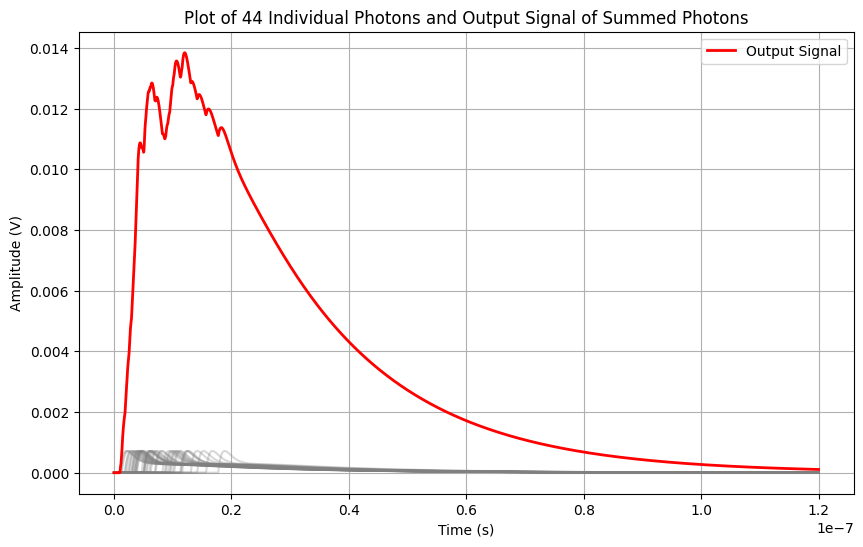

[ 9.94870328  5.01951225 11.00057025  2.79628449  5.38173202  5.26048449
  4.28821458  8.70130554 10.45375525  2.41372858  7.79580139  8.99688637
  2.2516498   1.95585833  4.59944526  3.31304108  9.17124342  4.53109114
  1.99026201  5.36636268  5.58030583  6.32299778  8.10981522  6.03299333
 15.18976836  3.27703035  0.7505641  11.33748919  5.30881379  6.37830023
 10.21374273  4.41828589 12.69229354 16.4296423   2.54394211  5.54049382
  2.68290309  3.70403474  2.12950876  6.65858044  6.14102257  7.72166208
  7.32285082  9.64503919 16.08439062]


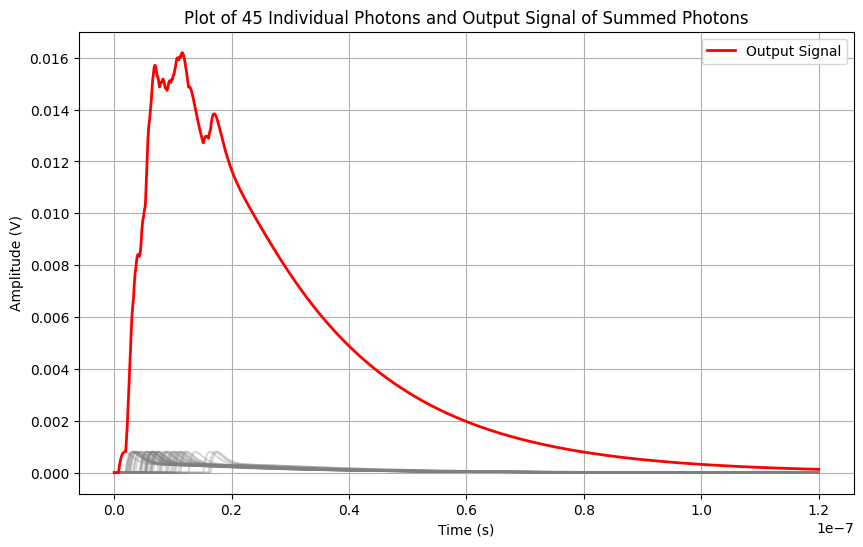

[10.01003557  1.52452075  5.1028912   2.47895965  3.25271039 11.4430487
  7.96551374 14.49820956  6.71983899  6.03432292  3.29341616 13.24118735
  7.00016823 10.15661524  5.93854485  1.88041511  2.5754995   3.73027436
  3.65976474  3.86028972 20.36017567  3.1690491  17.98427681 11.52891634
  2.89716185  5.83049206 13.05377546  9.90501283  3.10287324 24.2413915
  2.39168595 10.68532747  3.89927604  7.21016498  4.2195878   5.72641187
 12.21958373 14.87511093  9.72251483 15.93194689  2.47772973 15.11811652
 14.12895204 17.14204466  3.71618299  6.95110298]


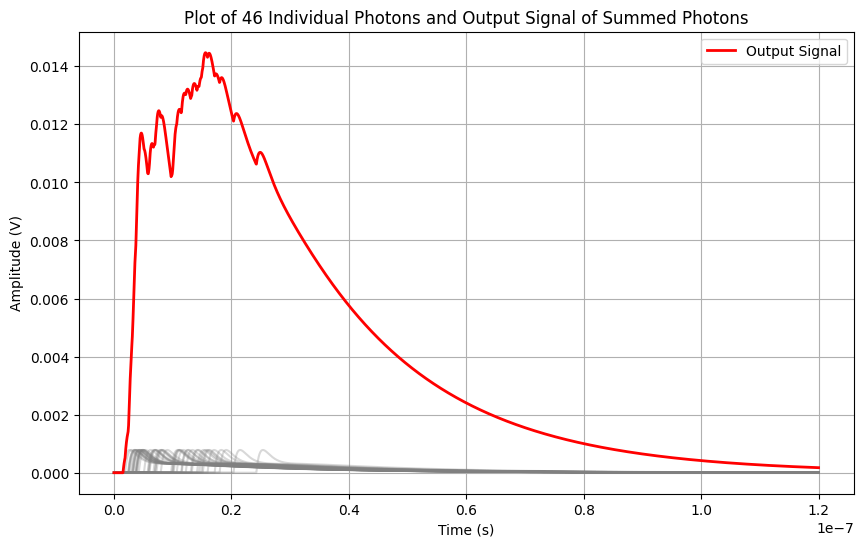

[ 2.06418489  9.24360258  0.38610169  0.87797702  5.64862475  7.85385291
 22.52798147 15.68613395  1.1687779   3.54019895 11.74429579 16.45955596
 11.26929729  3.64379712  9.81781987  4.37364332  5.15072833 25.13382634
  3.83046481  3.27876176 11.35573279  2.00728917  1.4927997   2.88472908
  5.20690069  3.90563201  3.34366531  4.18512251  6.62974691  7.24448732
 11.4722859   4.63868715  5.4146865   8.9754885   2.88563138  2.35205918
  3.83724018  6.27391935  7.10266406  4.00069403  5.24221742 20.18751523
 15.08193852  1.05628921  4.63596714 17.81800861  2.81646827]


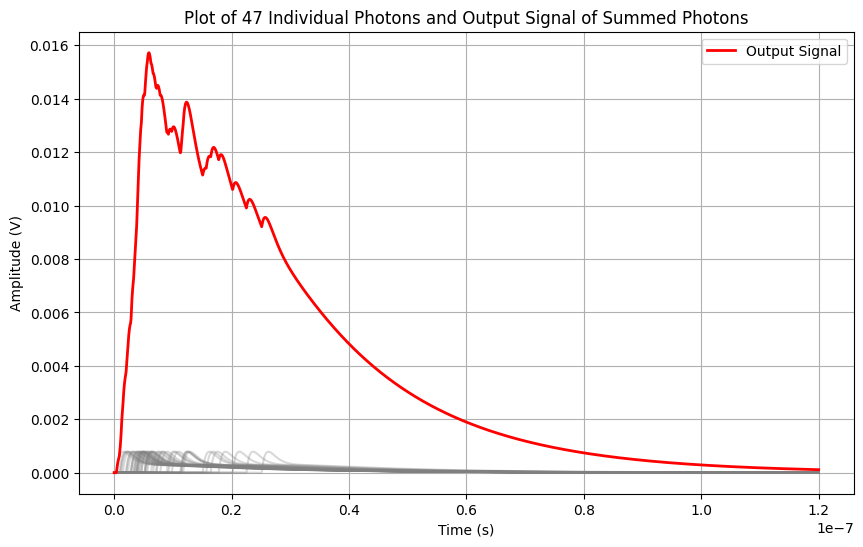

[ 4.92215782  6.15523467 12.7529838   2.37372243  3.38330033  8.52310163
  8.15244329 12.90078978  8.46974695  8.57746163  2.42012076 15.75685869
 13.65706765  7.89337714  2.81701977  7.97918085  2.64305386  5.76296112
  6.70956344  4.37587029  0.49183301  5.08362268  3.19301338 11.0962264
 11.14510917 15.56040445  3.32838015  4.79492581  3.95696613  1.06901084
  1.34301069  2.8731072   0.80358033  5.91811724  6.67098569  9.26443636
  7.18904652 18.97361476 15.10547597 15.24596674  6.10529567  9.031526
  1.65373889 11.33158437  1.80336492  5.6449106   5.26243505  4.24929137]


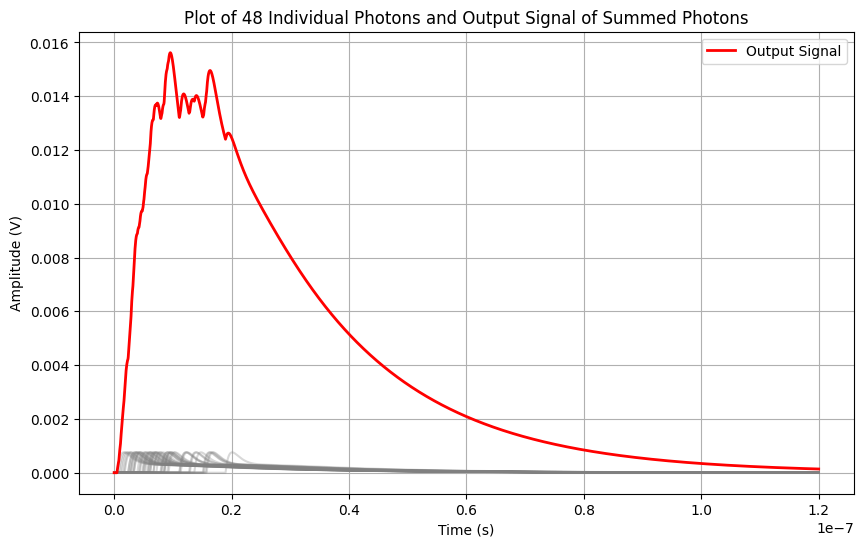

[16.9694451   7.15611779 10.80316248  6.34594158  7.06843798 10.28801117
  0.34578266  5.73639991 13.64449647  1.78852392  4.99887895  7.30583791
 24.72394693  3.39283449 10.08899132  6.34360796 14.7635034   2.15819298
  8.95598713  4.77413652 14.11533221 16.84997418  5.68822192  6.32572232
  4.63376603 16.08768007  7.17699512 11.62486018  0.84591303  0.93000397
  5.93969746  2.59435906  3.26134099 15.22658977 14.81549271  1.97906986
  8.37338117  6.75923752  4.8079646   6.71310571  3.52306972  2.56405496
  3.49410678  3.17798379  4.8555458   5.09945291  6.11532863 12.72513166
  8.11701848]


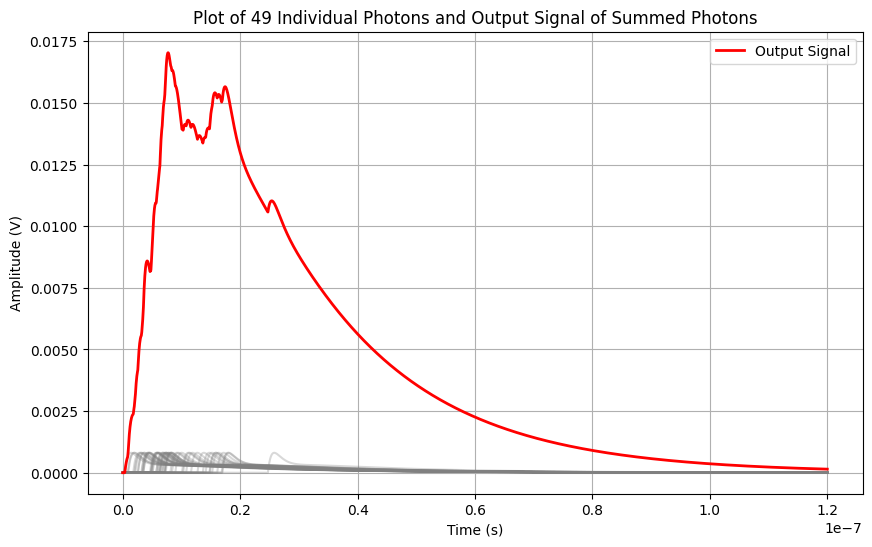

[ 5.72594367  4.9617842  10.14872768  9.88872627  4.03865508 10.12232581
  4.54536619  4.88899063  6.68569591  6.05148727  2.60115752 11.36536123
 14.6989169   3.43197342  3.94235778  1.22112353  6.93715419 12.05670785
  7.86859075  1.60883622  5.86777238  3.05210094  4.23744909 11.17364951
 17.12688921  1.2376795   4.27814709 11.31860806  1.57269226  4.74234246
  4.53266667  2.11832234  0.91648887  6.39600683  4.74226278  3.26892724
 13.38183749  2.00694005  7.38789988 14.08961185  4.89249245  0.83936388
 10.80169894  9.07684839 15.97700903  3.00682615  3.78876326  3.29308975
 15.58922523 14.824797  ]


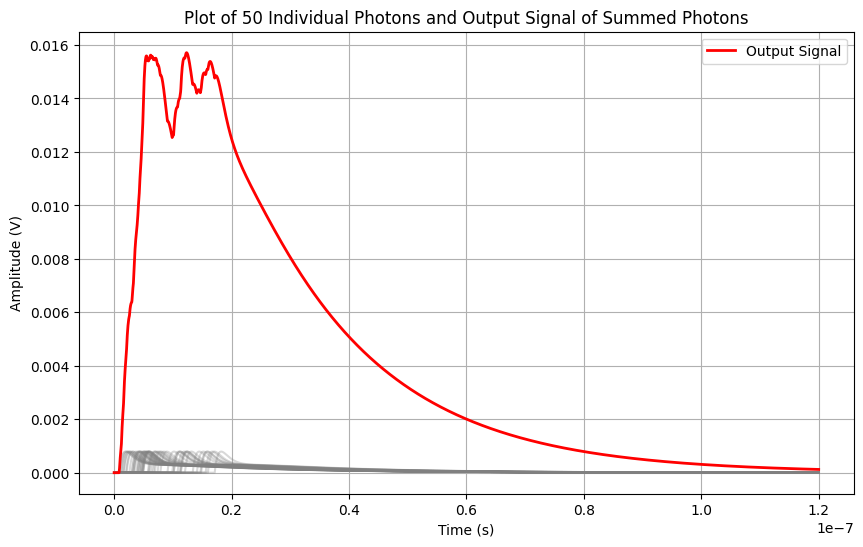

In [5]:
# Generate a sequence of numbers from 1 to 100
sequence = np.linspace(1, 50, 50)

# Convert the sequence to integers
photons_list = sequence.astype(int)

for n in photons_list:
    simulate_photon_data_combined(n)
